# Analysis of real estate advertisements 

Data contains information abiut real estate advertisements in Saint Petersburg and suburbs for the past several years. The goal is to learn how to define the market value of a property based on given parameters. The result will be used in an automated system that will be searching for anomalies and define fraudulent activity.

There are two types of data for each property:

- manual input by users
- automatically filled data based on map data (for instance, distance to the city center, airport, nearest park, or water pond).

Description of data:

- airports_nearest — distance to the nearest airport (м)
- balcony — number of balconies
- ceiling_height — the height of the ceiling (м)
- cityCenters_nearest — distance to the city center (м)
- days_exposition — for how long an ad has been published
- first_day_exposition — date of publication
- floor — floor
- floors_total — total number of floors in a property
- is_apartment — apartment (boolean type)
- kitchen_area — kitchen size in square meters (м²)
- last_price — the price at the ad's closure
- living_area — the size of the living area in square meters (м²)
- locality_name — the name of an area
- open_plan — open plan (boolean type)
- parks_around3000 — number of parks within 3 km
- parks_nearest — distance to the nearest park (м)
- ponds_around3000 — number of ponds within 3 km
- ponds_nearest — distance to the nearest pond (м)
- rooms — number of rooms
- studio — studio (boolean type)
- total_area — total size of a property in square meters (м²)
- total_images — number of photos of a property

## General overview of data.

Import main libraries and a file with data.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

realty = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


Check how many columns are displayed.

In [7]:
pd.options.display.max_columns

35

Increase number of columns to display to 35.

In [8]:
pd.set_option('max_columns', 35)

Check first 5 rows in the table.

In [9]:
display(realty.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Check general information about the table.

In [10]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Check values and their frequency in columns 'is_apartment', 'open_plan', 'studio'.

In [11]:
list = ['is_apartment', 'open_plan', 'studio']

In [12]:
for l in list:
    print(realty[l].value_counts())
    print('_________________________')

False    2725
True       50
Name: is_apartment, dtype: int64
_________________________
False    23632
True        67
Name: open_plan, dtype: int64
_________________________
False    23550
True       149
Name: studio, dtype: int64
_________________________


Check that kitchen size is missed for studios.

In [13]:
realty.query('studio == True and kitchen_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,NaN,25.0,18.20,5,NaN,True,False,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,NaN,True,False,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


Check the data where distance to the nearest airport is missed.

In [14]:
realty.query('airports_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,False,False,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check the areas where there is a distance to the nearest airport.

In [15]:
realty.query('airports_nearest > 0')['locality_name'].value_counts()

Санкт-Петербург            15635
посёлок Шушары               436
Пушкин                       369
Колпино                      337
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
Ломоносов                    132
Кронштадт                     95
посёлок Металлострой          66
посёлок Стрельна              44
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Репино                 4
посёлок Песочный               4
посёлок Усть-Ижора             2
посёлок Лисий Нос              2
посёлок Александровская        2
поселок Мурино                 2
посёлок Белоостров             1
посёлок Левашово               1
поселок Лисий Нос              1
посёлок Щеглово                1
посёлок Петро-Славянка         1
Name: locality_name, dtype: int64

Check the areas where a distance to the nearest airport is missed.

In [16]:
realty.query('airports_nearest.isna()')['locality_name'].value_counts()

посёлок Мурино                           522
Всеволожск                               398
Гатчина                                  307
деревня Кудрово                          299
Выборг                                   237
                                        ... 
поселок Жилпосёлок                         1
поселок Жилгородок                         1
деревня Кисельня                           1
садовое товарищество Новая Ропша           1
поселок городского типа Большая Ижора      1
Name: locality_name, Length: 344, dtype: int64

Check an assumption that a value is missed for the same rows in columns parks_nearest and parks_around3000.   

In [17]:
realty.query('parks_nearest.isna()')['parks_around3000'].value_counts() 

0.0    10102
Name: parks_around3000, dtype: int64

Check an assumption that a value is missed for the same rows in columns ponds_nearest and ponds_around3000.   

In [18]:
realty.query('ponds_nearest.isna()')['ponds_around3000'].value_counts() 

0.0    9071
Name: ponds_around3000, dtype: int64

Check main statistics of the dataset.

In [19]:
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Check duplicates.

In [20]:
realty.duplicated().sum()


0

### Conclusion

The names of the columns are correct.

There are 23699 rows in the table, there are missing values in some columns:

ceiling_height - values are missed in 39% of all rows. The decision is to replace by average value.

floors_total - values are missed in 86 rows, the assumption is that it is a manual mistake. The number of rows is relatively small, the decision is to delete these rows.

living_area - values are missed in 8% of all rows. The decision is to replace by median value of the properties with the same number of rooms.

kitchen_area - values are missed in 10% of all rows. For studio replace missing values with 0, for the rest types of properties replace missing values by average value.

balcony - replace missing values by 0.

locality_name - 49 values are missed, delete these rows.

airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 - this data was filled automatically, most likely there was a mistake in filling the data. Leave missing values as is.

parks_nearest, ponds_nearest - leave missing values as is.

days_exposition - values are missed in 13% of all rows. The assumption is that values are missed for the properties that have not sold yet. Replace missing values with the duration of publication (date of data extraction - date of publication), and add a new column indicating if a property is sold or not. 



**Data type**:

first_day_exposition - change the data type to DateTime;

floors_total - change data type to в int;

balcony - change data type to int after filling in missing values;

days_exposition - change data type to int after filling in missing values.

Descriptive statistics reveal that data contains outliers that need to be processed. (60 floors in a building, 100 meters of ceiling height, and 19 rooms in a flat).

Data contains no duplicates.


## Data preprocessing.

### Processing of missing values.

Replace missing values in column *ceiling_height* by median value.

In [21]:
ceiling_height_med = realty.ceiling_height.median()

realty['ceiling_height'] = realty['ceiling_height'].fillna(ceiling_height_med)


Check the result.

In [22]:
realty['ceiling_height'].isna().sum() 

0

Delete rows with missing values in a column *floors_total*.

In [23]:
realty.dropna(subset=['floors_total'], inplace=True)

Check the result.

In [24]:
realty['floors_total'].isna().sum()

0

Replace missing values in a column *living_area* by median value in a group of properties with the same number of rooms.

In [25]:
med = realty.groupby('rooms')['living_area'].transform('median')
realty['living_area'] = realty['living_area'].fillna(med)

Check the result.

In [26]:
realty['living_area'].isna().sum() 

0

Replace missing values in a column *is_apartment* by False.

In [27]:
realty['is_apartment'] = realty['is_apartment'].fillna(False)

Check the result.

In [28]:
realty['is_apartment'].isna().sum() 

0

Replace missing values in a column *kitchen_area* by: 0 - for studios, median value - for the rest types of appartments.

In [29]:
kitchen_area_med = realty.kitchen_area.median()

realty.loc[realty['studio'] == True, 'kitchen_area'] = 0

realty['kitchen_area'] = realty['kitchen_area'].fillna(kitchen_area_med)

Check the result.

In [30]:
realty['kitchen_area'].isna().sum()

0

Replace missing values in a column *balcony* by 0.

In [31]:
realty['balcony'] = realty['balcony'].fillna(0)

Check the result.

In [32]:
realty['balcony'].isna().sum()

0

Delete rows with missing values in a column *locality_name*

In [33]:
realty.dropna(subset=['locality_name'], inplace=True)

Check the result.

In [34]:
realty['locality_name'].isna().sum()

0

#### Conclusion

Missing values were processed in accordance with their meaning and quantity.

Median values were used to replace missing quantitive values, 49 and 86 missing values in columns locality_name and floors_total were deleted, and missing values in columns kitchen_area for studios and a number of balconies were replaced by 0.

### Change of datatype

Change datatype in a column *first_day_exposition* to datetime.

In [35]:
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Check the result.

In [36]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Add a column indicating if a property has been sold or not.

In [37]:
realty['sold'] = realty['days_exposition'] > 0

Check the result.

In [38]:
realty.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sold
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,False
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,True
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,True
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,True
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,True


Replace missing values in a column *days_exposition* by values that are calculated by the formula: date of data extraction - date of publication.

In [39]:
date = pd.to_datetime('2021-05-09')
realty['days_exposition'] = realty['days_exposition'].fillna((date - realty['first_day_exposition']).dt.days)

Check the result.

In [40]:
realty['days_exposition'].isna().sum() 

0

Change datatype in a column *floors_total* to int.

In [41]:
realty['floors_total'] = realty['floors_total'].astype('int')

Change datatype in a column *balcony* to int.

In [42]:
realty['balcony'] = realty['balcony'].astype('int')

Change datatype in a column *days_exposition* to int.

In [43]:
realty['days_exposition'] = realty['days_exposition'].astype('int')

Check general information about the dataset.

In [44]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Conclusion

Data was preprocessed for further analysis: missing values were filled, datatype was changed where necessary.

## Calculation and additional columns

Add a column with a price per sq meter.

In [45]:
realty['price_sqm'] = round(realty['last_price'] / realty['total_area'],2)

Add a column with a day, month and year of publication.

In [46]:
realty['weekday'] = realty['first_day_exposition'].dt.weekday
realty['month'] = realty['first_day_exposition'].dt.month
realty['year'] = realty['first_day_exposition'].dt.year

Create a formula to categorize a floor.

In [47]:
def floor_type (row):
    """
    Function categorizes aa floor
    If a floor number is 1 - category "first"
    If a floor number equals last floor - category "last" 
    Otherwise category is "other"
    """
    
    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'        
    
realty['floor_type'] = realty.apply(floor_type, axis=1)   

Add a column with a ratio of living area to total area.

In [48]:
realty['living_area_part'] = round(realty['living_area'] / realty['total_area'], 2)

Add a column with a ratio of kitchen area to total area.

In [49]:
realty['kitchen_area_part'] = round(realty['kitchen_area'] / realty['total_area'], 2)

Check the result.

In [50]:
realty.query('floor == floors_total').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sold,price_sqm,weekday,month,year,floor_type,living_area_part,kitchen_area_part
12,10,3890000.0,54.0,2016-06-30,2,2.65,5,30.0,5,False,False,False,9.0,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90,True,72037.04,3,6,2016,последний,0.56,0.17
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,False,False,False,5.2,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366,True,82943.93,5,7,2017,последний,0.63,0.12
23,11,2950000.0,32.0,2016-10-29,1,2.60,9,17.7,9,False,False,False,6.1,0,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615,True,92187.50,5,10,2016,последний,0.55,0.19
36,13,3790000.0,45.0,2017-01-25,2,2.65,9,27.0,9,False,False,False,6.3,2,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139,True,84222.22,2,1,2017,последний,0.60,0.14
43,13,9330000.0,48.0,2017-01-10,2,3.00,4,28.0,4,False,False,False,7.5,0,Санкт-Петербург,15016.0,10822.0,0.0,NaN,1.0,492.0,763,True,194375.00,1,1,2017,последний,0.58,0.16


Change dimension in column *last_price*.

In [51]:
realty['last_price'] = realty['last_price'] / 1000
realty = realty.rename(columns={'last_price':'last_price_thousands'})

Check the result.

In [52]:
realty.head(10)

,total_images,last_price_thousands,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sold,price_sqm,weekday,month,year,floor_type,living_area_part,kitchen_area_part
0,20,13000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,794,False,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,True,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,True,92785.71,3,8,2015,другой,0.61,0.15
3,0,64900.0,159.00,2015-07-24,3,2.65,14,45.00,9,False,False,False,9.10,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,True,408176.10,4,7,2015,другой,0.28,0.06
4,2,10000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,True,100000.00,1,6,2018,другой,0.32,0.41
5,10,2890.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,True,95065.79,0,9,2018,другой,0.47,0.30
6,6,3700.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,True,99195.71,3,11,2017,другой,0.28,0.39
7,5,7915.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,752,False,110544.69,3,4,2019,другой,0.43,0.26
8,20,2900.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,True,87454.76,2,5,2018,другой,0.47,0.27
9,18,5400.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,True,88524.59,6,2,2017,другой,0.71,0.11


### Conclusion

The columns with price per sq meter, day, month, and year of the ad's publication, floor category, the ratio of living area to the total area, and the ratio of the kitchen area to the total area were added for future analysis. 

## Exploratory data analysis

### Analysis of parameters of a dataset


Check the main statistics in column *total_area*.

In [53]:
realty['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Create a histogram for column *total_area*.

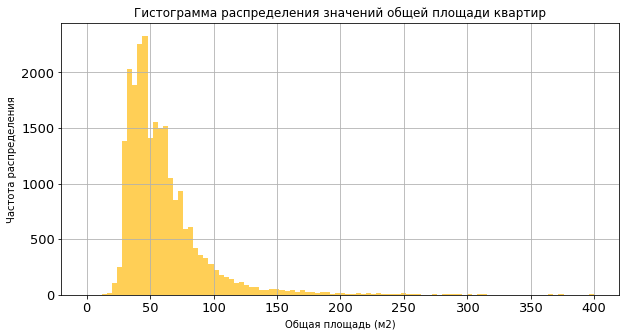

In [54]:
realty['total_area'].plot(kind='hist', 
                          bins=100, 
                          range=(0,400), 
                          title='Гистограмма распределения значений общей площади квартир', 
                          grid=True,
                          figsize=(10,5),
                          fontsize=13, 
                          color=['#FFCF56']);
plt.xlabel('Общая площадь (м2)');
plt.ylabel('Частота распределения');

Create a boxplot for column *total_area*.

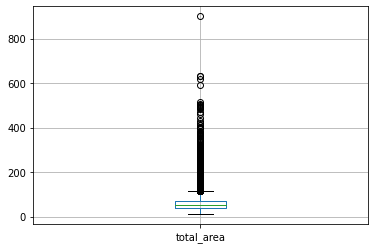

In [55]:
realty.boxplot('total_area')
plt.show()

Check the main statistics in column *last_price_thousands*.

In [56]:
realty['last_price_thousands'].describe()

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price_thousands, dtype: float64

Create a histogram for column *last_price_thousands*.

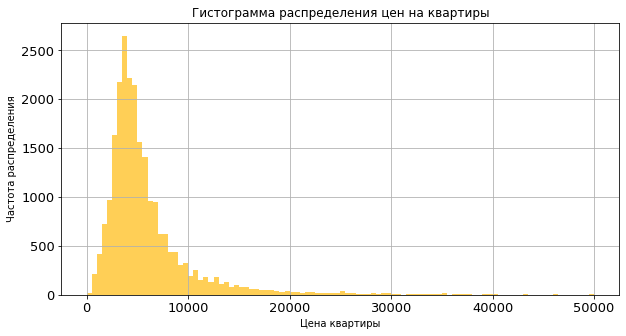

In [57]:
realty['last_price_thousands'].plot(kind='hist', 
                          bins=100, 
                          range=(0,50000), 
                          title='Гистограмма распределения цен на квартиры', 
                          grid=True,
                          figsize=(10,5),
                          fontsize=13, 
                          color=['#FFCF56']);
plt.xlabel('Цена квартиры');
plt.ylabel('Частота распределения');


Create a boxplot for column *last_price_thousands*.

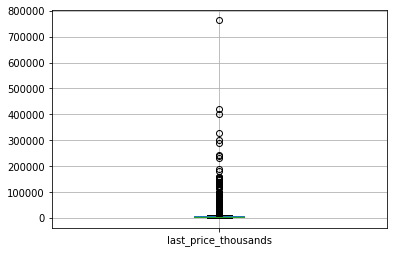

In [58]:
realty.boxplot('last_price_thousands')
plt.show()

Check the main statistics in column *rooms*.

In [59]:
realty['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Create a histogram for column *rooms*.

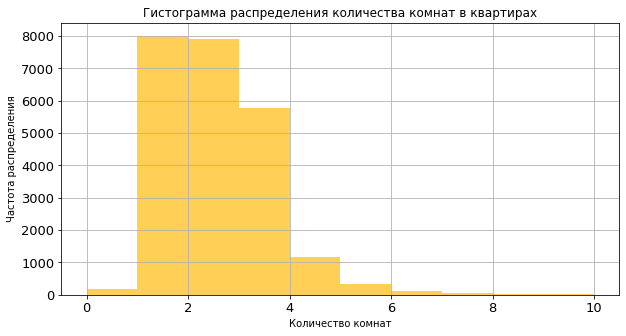

In [60]:
realty['rooms'].plot(kind='hist', 
                          bins=10, 
                          range=(0,10), 
                          title='Гистограмма распределения количества комнат в квартирах', 
                          grid=True,
                          figsize=(10,5),
                          fontsize=13, 
                          color=['#FFCF56']);
plt.xlabel('Количество комнат');
plt.ylabel('Частота распределения');

Create a boxplot for column *rooms*.

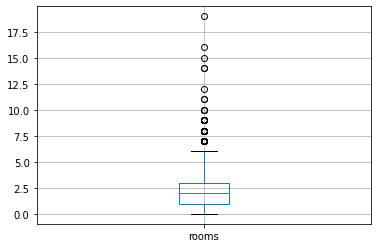

In [62]:
realty.boxplot('rooms')
plt.show()

Check the main statistics in column *ceiling_height*

In [63]:
realty['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Create a histogram for column *ceiling_height*.

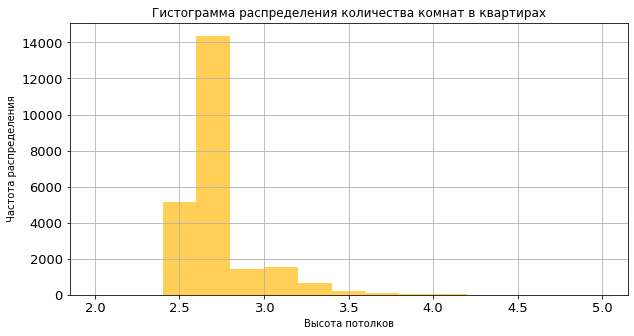

In [64]:
realty['ceiling_height'].plot(kind='hist', 
                          bins=15, 
                          range=(2,5), 
                          title='Гистограмма распределения количества комнат в квартирах', 
                          grid=True,
                          figsize=(10,5),
                          fontsize=13, 
                          color=['#FFCF56']);
plt.xlabel('Высота потолков');
plt.ylabel('Частота распределения');

Create a boxplot for column *ceiling_height*.

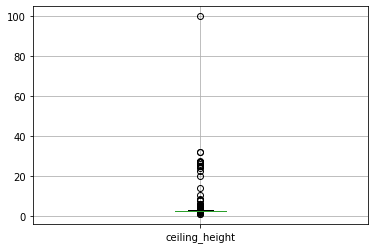

In [65]:
realty.boxplot('ceiling_height')
plt.show()

Check the main statistics in column *days_exposition* for sold appartments.

In [66]:
realty.query('sold == True')['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Check the main statistics in column *days_exposition* for sold and unsold appartments together.

In [67]:
realty['days_exposition'].describe()

count    23565.000000
mean       284.933376
std        352.390581
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max       2355.000000
Name: days_exposition, dtype: float64

Create a histogram for column *days_exposition* for sold appartments.

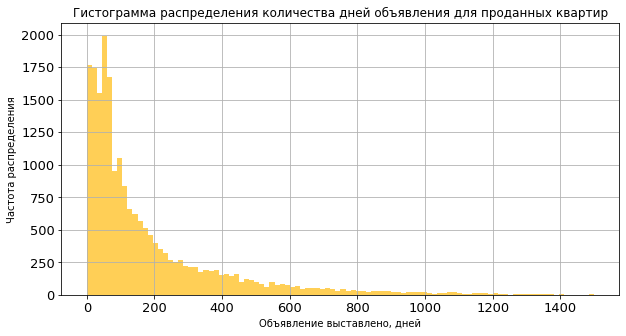

In [68]:
realty.query('sold==True')['days_exposition'].plot(kind='hist', 
                          bins=100, 
                          range=(0,1500), 
                          title='Гистограмма распределения количества дней объявления для проданных квартир', 
                          grid=True,
                          figsize=(10,5),
                          fontsize=13, 
                          color=['#FFCF56']);
plt.xlabel('Объявление выставлено, дней');
plt.ylabel('Частота распределения');

Create a histogram for column *days_exposition* for both sold and unsold appartments.

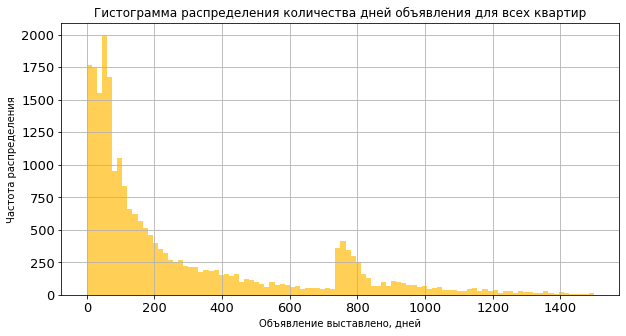

In [69]:
realty['days_exposition'].plot(kind='hist', 
                          bins=100, 
                          range=(0,1500), 
                          title='Гистограмма распределения количества дней объявления для всех квартир', 
                          grid=True,
                          figsize=(10,5),
                          fontsize=13, 
                          color=['#FFCF56']);
plt.xlabel('Объявление выставлено, дней');
plt.ylabel('Частота распределения');

Create a histogram for column *days_exposition* for unsold appartments. 

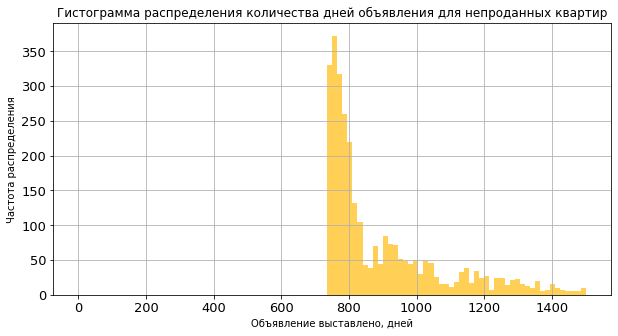

In [70]:
realty.query('sold==False')['days_exposition'].plot(kind='hist', 
                          bins=100, 
                          range=(0,1500), 
                          title='Гистограмма распределения количества дней объявления для непроданных квартир', 
                          grid=True,
                          figsize=(10,5),
                          fontsize=13, 
                          color=['#FFCF56']);
plt.xlabel('Объявление выставлено, дней');
plt.ylabel('Частота распределения');

Calculate 95% percentile for columns *total_area*, *last_price_thousands*, *rooms*, *ceiling_height*.

In [71]:
realty[['total_area', 'last_price_thousands', 'rooms', 'ceiling_height']].quantile(0.95,interpolation='nearest')


total_area                116.00
last_price_thousands    15300.00
rooms                       4.00
ceiling_height              3.13
Name: 0.95, dtype: float64

In [72]:
realty.query('sold==True')['days_exposition'].quantile(0.95,interpolation='nearest')

647

Delete data beyond 95% percentile and check 5 first rows of the dataset.

In [73]:
realty_good = realty.query('total_area <= 116 and 100 < last_price_thousands <= 15300 and rooms <= 4 and ceiling_height <= 3.13 and days_exposition <= 647')
realty_good.head()

,total_images,last_price_thousands,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sold,price_sqm,weekday,month,year,floor_type,living_area_part,kitchen_area_part
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,True,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,True,92785.71,3,8,2015,другой,0.61,0.15
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,True,100000.00,1,6,2018,другой,0.32,0.41
5,10,2890.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,True,95065.79,0,9,2018,другой,0.47,0.30
6,6,3700.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.4,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,True,99195.71,3,11,2017,другой,0.28,0.39


#### Conclusion

There are outliers in a dataset, and data beyond the 95% percentile is deleted, as the result: 

- total_area is up to 116м.
- last_price_thousands is within range 100 and 15300 
- number of room is up to 4
- ceiling height is up to 3.13м

As the result of the analysis of data in *days_exposition* column, it was revealed that there is a second peak. The assumption is that it is related to the date of data extraction. In future analysis, only data on sold apartments will be utilized. In general, an apartment is sold within 181 days with medina 95 days. There are apartments that were on the market for too long, we consider them outliers and exclude them from the dataset. The maximum remaining value for this column is 647. If the flat is sold within 45 days it could be considered a fast sale.


### Define factors that influence an appartment price.

Check correlation between appartment price and total area size. 

In [74]:
realty_good['last_price_thousands'].corr(realty_good['total_area'])

0.7243637876909047

Create a graph. A graph show that there is a correlation between two factors. 

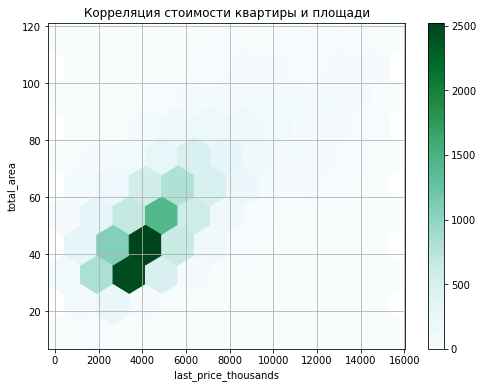

In [75]:
realty_good.plot(
    x='last_price_thousands', 
    y='total_area', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(8, 6), 
    sharex=False, 
    grid=True, 
    title='Корреляция стоимости квартиры и площади'
); 


Check correlation between appartment price and number of rooms.

In [76]:
realty_good['last_price_thousands'].corr(realty_good['rooms'])

0.43893529686943206

Create a graph. A graph show that data is more spread and a correlation between two factors is weaker.

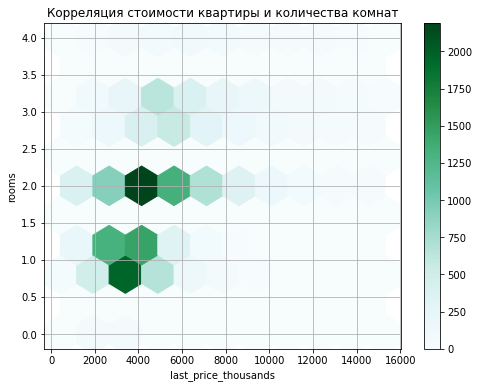

In [77]:
realty_good.plot(
    x='last_price_thousands', 
    y='rooms', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(8, 6), 
    sharex=False, 
    grid=True, 
    title='Корреляция стоимости квартиры и количества комнат'
); 

Check correlation between appartment price and distance to the city center.

In [78]:
realty_good['last_price_thousands'].corr(realty_good['cityCenters_nearest'])

-0.3280858913189163

Create a graph. There is some correlation between two factors but not that strong.

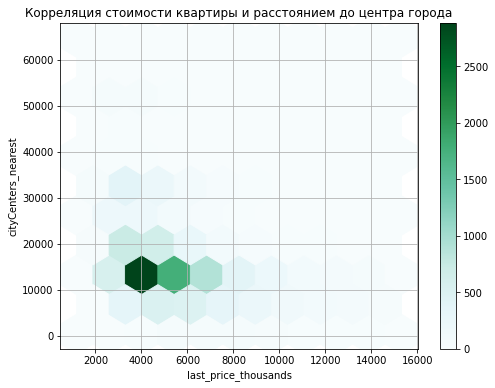

In [79]:
realty_good.plot(
    x='last_price_thousands', 
    y='cityCenters_nearest', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(8, 6), 
    sharex=False, 
    grid=True, 
    title='Корреляция стоимости квартиры и расстоянием до центра города'
); 

Check correlation between appartment price and day of ad publication.

In [80]:
realty_good['last_price_thousands'].corr(realty_good['weekday'])

-0.009382936182916688

Create a graph. A graph shows almost no correaltion between two factors.

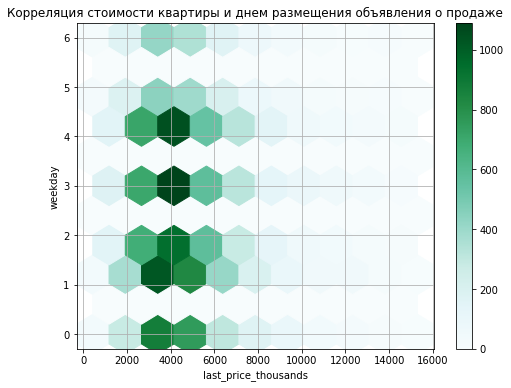

In [81]:
realty_good.plot(
    x='last_price_thousands', 
    y='weekday', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(8, 6), 
    sharex=False, 
    grid=True, 
    title='Корреляция стоимости квартиры и днем размещения объявления о продаже'
); 

Check correlation between appartment price and month of ad publication.

In [82]:
realty_good['last_price_thousands'].corr(realty_good['month'])

0.006034260324979033

Create a graph. A graph shows almost no correaltion between two factors.

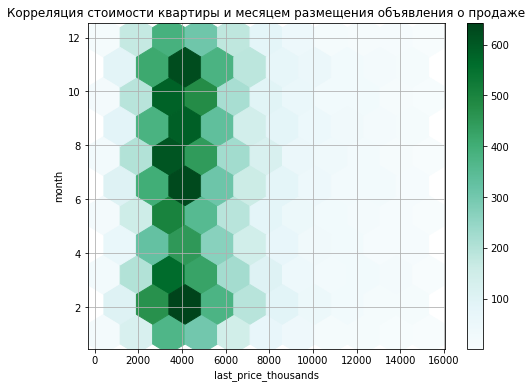

In [83]:
realty_good.plot(
    x='last_price_thousands', 
    y='month', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(8, 6), 
    sharex=False, 
    grid=True, 
    title='Корреляция стоимости квартиры и месяцем размещения объявления о продаже'
); 

Check correlation between appartment price and year of ad publication.

In [84]:
realty_good['last_price_thousands'].corr(realty_good['year'])

-0.008410420882454627

Create a graph. A graph shows almost no correaltion between two factors.

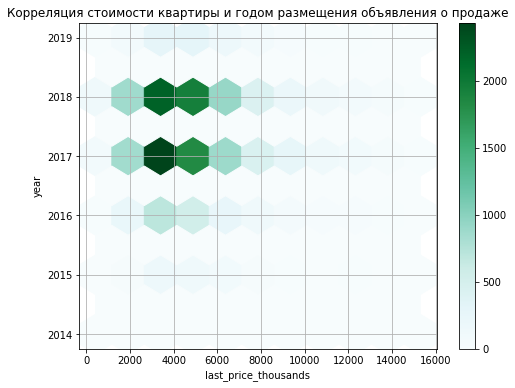

In [85]:
realty_good.plot(
    x='last_price_thousands', 
    y='year', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(8, 6), 
    sharex=False, 
    grid=True, 
    title='Корреляция стоимости квартиры и годом размещения объявления о продаже'
); 

Add column to define floor category via a number.

In [86]:
def floor_type_num (floor_type):
    """
    Function assigns a number to a value
    First floor - number 1
    Last floor - number 3
    Other floor - number 2
    
    """
    if floor_type == 'первый':
        return 1
    if floor_type == 'другой':
        return 2
    if floor_type == 'последний':
        return 3
    
realty_good['floor_type_numeric'] = realty_good['floor_type'].apply(floor_type_num)    

/tmp/ipykernel_110/2201674283.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realty_good['floor_type_numeric'] = realty_good['floor_type'].apply(floor_type_num)


Check correlation between appartment price and floor category.

In [87]:
realty_good['last_price_thousands'].corr(realty_good['floor_type_numeric'])

0.05082577002419452

Create a graph. 

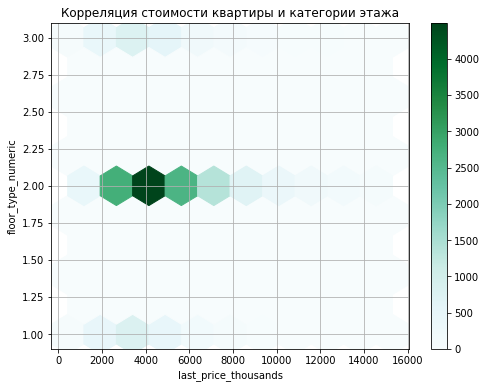

In [88]:
realty_good.plot(
    x='last_price_thousands', 
    y='floor_type_numeric', 
    kind='hexbin', 
    gridsize=10, 
    figsize=(8, 6), 
    sharex=False, 
    grid=True, 
    title='Корреляция стоимости квартиры и категории этажа'
); 

#### Conclusion.

The factors that influence the price of an apartment rank as the following:

- total area size has the strongest correlation with the price,
- number of rooms follows the total area size,
- distance to a city center has a mild negative correlation with price (the further an apartment the smaller the price is),
- a correlation between days of publication, floor, and price of apartments is weak.


### Analyse the price of appartment depending on a distance from the city center

Define top 10 areas with maximum number of ads.

In [89]:
locations_top = realty['locality_name'].value_counts().head(10).to_frame().reset_index()
locations_top.columns=['locality_name','quantity']
locations_top

,locality_name,quantity
0,Санкт-Петербург,15651
1,посёлок Мурино,520
2,посёлок Шушары,439
3,Всеволожск,398
4,Пушкин,369
5,Колпино,338
6,посёлок Парголово,327
7,Гатчина,307
8,деревня Кудрово,299
9,Выборг,237


In [127]:
realty_good.query('locality_name in @locations_top.locality_name').pivot_table(index='locality_name', values='last_price_thousands', aggfunc=['mean','min','max']).reset_index()


,locality_name,mean,min,max
,,last_price_thousands,last_price_thousands,last_price_thousands
0,Всеволожск,3603.614786,965.78,10890.0
1,Выборг,2930.672043,600.00,7200.0
2,Гатчина,3327.307935,850.00,9500.0
3,Колпино,3755.722495,2100.00,12750.0
4,Пушкин,5292.184194,1990.00,15000.0
5,Санкт-Петербург,5669.384218,1190.00,15300.0
6,деревня Кудрово,4215.970097,1800.00,10500.0
7,посёлок Мурино,3639.033496,1730.00,7940.0
8,посёлок Парголово,4392.823490,1400.00,9140.0


#### Conclusion.

The highest average price is in St. Petersburg and Pushkin.
 

### Analyse ads of appartments in St. Petersburg.

Filter ads by locality_name St. Petersburg.

In [91]:
realty_spb = realty_good.query('locality_name == "Санкт-Петербург"')
realty_spb.head()

,total_images,last_price_thousands,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sold,price_sqm,weekday,month,year,floor_type,living_area_part,kitchen_area_part,floor_type_numeric
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,True,92785.71,3,8,2015,другой,0.61,0.15,2
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,True,100000.00,1,6,2018,другой,0.32,0.41,2
9,18,5400.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,True,88524.59,6,2,2017,другой,0.71,0.11,2
10,5,5050.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,True,127525.25,3,11,2017,другой,0.51,0.21,2
15,16,4650.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19,True,119230.77,5,11,2017,другой,0.53,0.19,2


Add a column with distance in km.

In [92]:
#Create column with distance in kms
realty_spb['center_km'] = round(realty_spb['cityCenters_nearest'] / 1000)
realty_spb.head()

/tmp/ipykernel_110/1274014678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realty_spb['center_km'] = round(realty_spb['cityCenters_nearest'] / 1000)


,total_images,last_price_thousands,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sold,price_sqm,weekday,month,year,floor_type,living_area_part,kitchen_area_part,floor_type_numeric,center_km
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,True,92785.71,3,8,2015,другой,0.61,0.15,2,14.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,True,100000.00,1,6,2018,другой,0.32,0.41,2,8.0
9,18,5400.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,True,88524.59,6,2,2017,другой,0.71,0.11,2,15.0
10,5,5050.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,True,127525.25,3,11,2017,другой,0.51,0.21,2,14.0
15,16,4650.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19,True,119230.77,5,11,2017,другой,0.53,0.19,2,14.0


Check the dynamics of price changes depdending on a distance from the city center. 

In [93]:
realty_spb_km_mean = realty_spb.groupby('center_km')['price_sqm'].mean().to_frame().reset_index()
realty_spb_km_mean.head(10)

,center_km,price_sqm
0,0.0,110780.312500
1,1.0,126707.142131
2,2.0,120882.875872
3,3.0,109465.595000
4,4.0,122061.751137
5,5.0,126915.421474
6,6.0,125473.076916
7,7.0,119840.759958
8,8.0,118053.237179
9,9.0,107940.429448


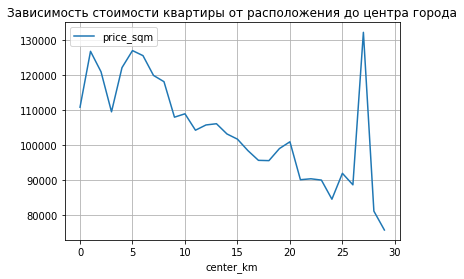

In [94]:
realty_spb_km_mean.plot(x='center_km',y='price_sqm', grid=True, title='Зависимость стоимости квартиры от расположения до центра города');


The graph revealed an outlier, delete it.

In [95]:
realty_spb.query('center_km == 27')

,total_images,last_price_thousands,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sold,price_sqm,weekday,month,year,floor_type,living_area_part,kitchen_area_part,floor_type_numeric,center_km
748,13,14350.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128,True,193918.92,1,11,2017,другой,0.41,0.34,2,27.0
5961,6,2250.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0.0,NaN,0.0,NaN,178,True,70312.50,1,2,2018,последний,0.52,0.22,3,27.0


In [96]:
realty_spb = realty_spb.query('center_km != 27 and price_sqm != 193918.92')

Check the result.

In [97]:
realty_spb_km_mean = realty_spb.groupby('center_km')['price_sqm'].mean().to_frame().reset_index()
realty_spb_km_mean.head()

,center_km,price_sqm
0,0.0,110780.312500
1,1.0,126707.142131
2,2.0,120882.875872
3,3.0,109465.595000
4,4.0,122061.751137


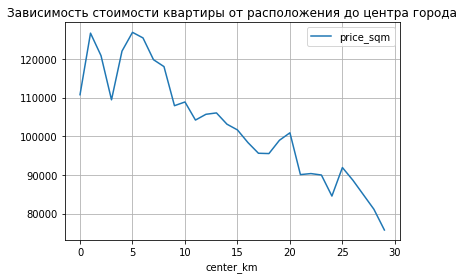

In [98]:
realty_spb_km_mean.plot(x='center_km',y='price_sqm',grid=True, title='Зависимость стоимости квартиры от расположения до центра города');


Check the ads with the distance <= 7 km.

In [99]:
realty_spb_center = realty_spb.query('center_km <= 7')

Check statistics for total area in ads for St. Peterburg.

In [100]:
realty_spb['total_area'].describe()

count    11409.000000
mean        53.867192
std         18.831335
min         12.000000
25%         39.800000
50%         49.900000
75%         64.800000
max        116.000000
Name: total_area, dtype: float64

Check statistics for total area in ads for appartments in the center of St. Peterburg.

In [101]:
realty_spb_center['total_area'].describe()

count    1605.000000
mean       64.404467
std        21.696624
min        12.000000
25%        46.500000
50%        62.500000
75%        80.000000
max       116.000000
Name: total_area, dtype: float64

Check statistics for price in ads for St. Peterburg.

In [102]:
realty_spb['last_price_thousands'].describe()

count    11409.000000
mean      5668.923071
std       2401.143545
min       1190.000000
25%       3990.000000
50%       4990.000000
75%       6700.000000
max      15300.000000
Name: last_price_thousands, dtype: float64

Check statistics for price in ads for the center of St. Peterburg.

In [103]:
realty_spb_center['last_price_thousands'].describe()

count     1605.000000
mean      7676.148083
std       2789.752006
min       1600.000000
25%       5600.000000
50%       7200.000000
75%       9330.000000
max      15300.000000
Name: last_price_thousands, dtype: float64

Check statistics for number of rooms in ads for St. Peterburg.

In [104]:
realty_spb['rooms'].describe()

count    11409.000000
mean         1.921904
std          0.881446
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

Check statistics for number of rooms in ads for the center of St. Peterburg.

In [105]:
realty_spb_center['rooms'].describe()

count    1605.000000
mean        2.217445
std         0.923884
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: rooms, dtype: float64

Check statistics for height of ceiling in ads for St. Peterburg.

In [106]:
realty_spb['ceiling_height'].describe()

count    11409.000000
mean         2.659622
std          0.126818
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.130000
Name: ceiling_height, dtype: float64

Check statistics for height of ceiling in ads for the center of St. Peterburg.

In [107]:
realty_spb_center['ceiling_height'].describe()

count    1605.000000
mean        2.744748
std         0.162949
min         2.400000
25%         2.650000
50%         2.650000
75%         2.850000
max         3.130000
Name: ceiling_height, dtype: float64

Check correlation between number of rooms and price in St. Petersburg.

In [108]:
realty_spb['last_price_thousands'].corr(realty_spb['rooms'])

0.4950112851422594

Check correlation between number of rooms and price in the center of St. Petersburg.

In [109]:
realty_spb_center['last_price_thousands'].corr(realty_spb['rooms'])

0.41969937390369105

Check correlation between floor and price in St. Petersburg.

In [110]:
realty_spb['last_price_thousands'].corr(realty_spb['floor'])

0.09086428252595863

Check correlation between number of floors and price in the center of St. Petersburg.

In [111]:
realty_spb_center['last_price_thousands'].corr(realty_spb['floor'])

0.1961729582243992

Check correlation between distance to the city center and price in St. Petersburg.

In [112]:
realty_spb['last_price_thousands'].corr(realty_spb['center_km'])

-0.33618699444845207

Check correlation between distance to the city center and price in the center of St. Petersburg.

In [113]:
realty_spb_center['last_price_thousands'].corr(realty_spb['center_km'])

-0.08662595124171624

Add a column with a number representing the date of ad's publication. 

In [128]:
realty_spb['day_exp'] = realty_spb['first_day_exposition'].astype(int) / 10**10
realty_spb.head()

,total_images,last_price_thousands,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sold,price_sqm,weekday,month,year,floor_type,living_area_part,kitchen_area_part,floor_type_numeric,center_km,day_exp
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,True,92785.71,3,8,2015,другой,0.61,0.15,2,14.0,144002880.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,True,100000.00,1,6,2018,другой,0.32,0.41,2,8.0,152936640.0
9,18,5400.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,True,88524.59,6,2,2017,другой,0.71,0.11,2,15.0,148806720.0
10,5,5050.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137,True,127525.25,3,11,2017,другой,0.51,0.21,2,14.0,151079040.0
15,16,4650.0,39.0,2017-11-18,1,2.65,14,20.5,5,False,False,False,7.6,1,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19,True,119230.77,5,11,2017,другой,0.53,0.19,2,14.0,151096320.0


Check correlation between date of ad's publication and price in St. Petersburg.

In [115]:
realty_spb['last_price_thousands'].corr(realty_spb['day_exp'])

0.0013046455846334457

Check correlation between date of ad's publication and price in the center of St. Petersburg.

In [116]:
realty_spb_center['last_price_thousands'].corr(realty_spb['day_exp'])

-0.033036380681267644

#### Conclusion.

In St. Petersburg there are hiccups in prices within 7 km distance from the city center, after 7 km there is a steady decline in price. We assume, that 7 km radius could be considered as a *city center*.

In general, apartments in the city center are larger and more expensive. Median number of rooms is 2, however mean is 3, which indicates that apartments in the city center have more rooms. The ceilings are higher in the city center as well.

Correlation between price and number of rooms is approximately 0.5 and is higher for the apartments outside of city center. Number of floor has higher correlation  with the price for the apartments within the city center. Distance from the city center has low correlation within city center at the same time correlation is high for the appartments outside of city center. Date of publication has low correlation with the price for all apartments. 


## General conclusion

The dataset contained big amount of missing values, presumably there was a bug while downloading data and it is recommended to send a bug report to the developers. The data was cleaned from outliers. 

Total area and number of rooms were identified as parameters that have the strongest correlation with the price of an appartment. The most expensive apartments are in St. Petersburg and Pushkin.

The price of the apartments in the city center is considerably higher than the price outside of the city center. Beside proximity, these apartments on average have larger total area, more rooms and higher ceilings.  